## Business case: Predicting quality of wine with given feature

In [3]:
#importing package and loading data
import pandas as pd
import numpy as np
data=pd.read_csv('wine.csv')
data

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Basic Check

In [4]:
data.head(5)

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.tail()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
data.wine.value_counts()

2    71
1    59
3    48
Name: wine, dtype: int64

In [8]:
data.rename(columns={'Wine':'wine','Alcohol':'alcohol','Alcalinity of ash':'AOA','Total phenols':'total_phe',
                     'Nonflavanoid phenols':'NOP','Color intensity':'color_intensity','Hue':'hu',
                     'OD280/OD315 of diluted wines':'DW','Malic acid':'M_acid'},inplace=True)
#renaming all columns

In [9]:
#importing package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#creation of data frame which continuous variable
box=data[['alcohol','M_acid','Ash','AOA','Magnesium','total_phe','Flavanoids','NOP','Proanthocyanins','color_intensity','hu','DW','Proline']]

## Data preprocessing

In [11]:
data.isnull().sum()

wine               0
alcohol            0
M_acid             0
Ash                0
AOA                0
Magnesium          0
total_phe          0
Flavanoids         0
NOP                0
Proanthocyanins    0
color_intensity    0
hu                 0
DW                 0
Proline            0
dtype: int64

In [12]:
data.columns

Index(['wine', 'alcohol', 'M_acid', 'Ash', 'AOA', 'Magnesium', 'total_phe',
       'Flavanoids', 'NOP', 'Proanthocyanins', 'color_intensity', 'hu', 'DW',
       'Proline'],
      dtype='object')

In [ ]:
for c in data.columns:#columns form datasets
    if(data[c].dtype==object):#checking datatype of labels
        print(c)  #categorical columns


In [13]:
data.info() ##no object datatype is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   wine             178 non-null    int64  
 1   alcohol          178 non-null    float64
 2   M_acid           178 non-null    float64
 3   Ash              178 non-null    float64
 4   AOA              178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   total_phe        178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   NOP              178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  color_intensity  178 non-null    float64
 11  hu               178 non-null    float64
 12  DW               178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Outlier Handling

In [14]:
#outlier handling for M_acid and its not a normal so we use IQR range
from scipy import stats#import stats to calculat mod

In [15]:
IQR = stats.iqr(data.M_acid, interpolation = 'midpoint') #calculating Inter quantile range

IQR

1.46

In [16]:
Q1=data.M_acid.quantile(0.25)#defining 25% of data
Q3=data.M_acid.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit


In [17]:
print(min_limit,max_limit)

-0.5874999999999999 5.2725


In [18]:
data.loc[data['M_acid']<min_limit] #checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [19]:
data.loc[data['M_acid']>max_limit]#checking values which are greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [20]:
data.loc[data['M_acid']>max_limit,'M_acid']=np.median(data.M_acid)#imputing value with median

In [21]:
np.median(data.M_acid)

1.8625000000000003

In [22]:
data.loc[data['M_acid']>max_limit]#checking whether outlier remove or not

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


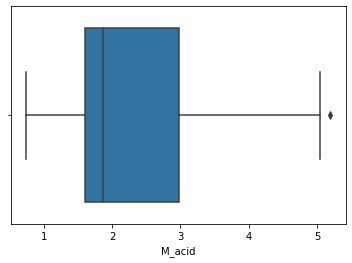

In [23]:
sns.boxplot(data.M_acid)#boxplot to check outlier
plt.show()

## Ash

In [24]:
# for ash we will use 3 sigma rule 
lower_limit=data.Ash.mean() - 3*data.Ash.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Ash.mean() + 3*data.Ash.std()#calculating upper limit
upper_limit

1.543484826750141


3.1895488811150297

In [25]:
data.loc[data['Ash']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [26]:
data.loc[data['Ash']<lower_limit,'Ash']=np.mean(data.Ash)

In [27]:
data.loc[data['Ash']<lower_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [28]:
data.loc[data['Ash']>upper_limit]#checking values which are greater than maximum limit


,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [29]:
data.loc[data['Ash']>upper_limit,'Ash']=np.mean(data.Ash)#imputing value with mean

In [30]:
data.loc[data['Ash']>upper_limit]#recheck

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


## AOA this is a normally distrubuted using 3 sigma rule

In [31]:
data.sort_values('AOA')

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
59,2,12.37,0.94,2.366517,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
1,1,13.20,1.78,2.140000,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13,1,14.75,1.73,2.390000,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
14,1,14.38,1.87,2.380000,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
50,1,13.05,1.73,2.040000,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,12.42,4.43,2.730000,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
157,3,12.45,3.03,2.640000,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
121,2,11.56,2.05,2.372171,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.780000,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [32]:
lower_limit=data.AOA.mean() - 3*data.AOA.std()##calculating lower limit
print(lower_limit)

upper_limit=data.AOA.mean() + 3*data.AOA.std()#calculating upper limit
upper_limit

9.476252518704204


29.513635121745235

In [33]:
data.loc[data['AOA']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [34]:
data.loc[data['AOA']<lower_limit,'AOA']=np.median(data.AOA)#imputing value with median

In [35]:
data.loc[data['AOA']<lower_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [36]:
data.loc[data['AOA']>upper_limit]#checking values which are greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
73,2,12.99,1.67,2.6,30.0,139,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985


In [37]:
data.loc[data['AOA']>upper_limit,'AOA']=np.mean(data.AOA)#imputing value with mean

In [38]:
data.loc[data['AOA']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


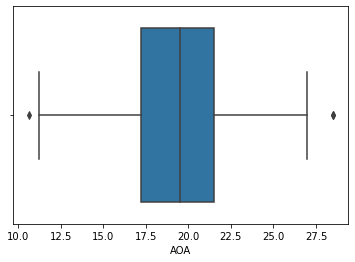

In [39]:
sns.boxplot(data.AOA)
plt.show()

In [40]:
data.AOA=np.(data.AOA)

SyntaxError: invalid syntax (Temp/ipykernel_12120/4118265790.py, line 1)

## Magnesium is normal curve so using 3 sigma rule

In [54]:
lower_limit=data.Magnesium.mean() - 3*data.Magnesium.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Magnesium.mean() + 3*data.Magnesium.std()#calculating upper limit
upper_limit

56.89412248782086


142.58902357959488

In [55]:
data.loc[data['Magnesium']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [56]:
data.loc[data['Magnesium']>upper_limit]#checking values which are  greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [57]:
data.loc[data['Magnesium']>upper_limit,'Magnesium']=np.mean(data.Magnesium)#imputing values using mean

In [58]:
data.loc[data['Magnesium']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


<AxesSubplot:xlabel='wine', ylabel='count'>

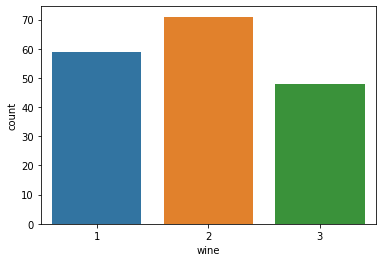

In [59]:
# Checking the balance of data.
sns.countplot(x='wine',data=data)

## Feature selection

In [42]:
data.describe()

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
count,178.000000,178.000000,178.00000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.27250,2.362589,19.435927,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.03003,0.247382,3.244334,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.74000,1.700000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.60250,2.212500,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.86250,2.360000,19.497472,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,2.98250,2.540000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.19000,2.920000,28.500000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

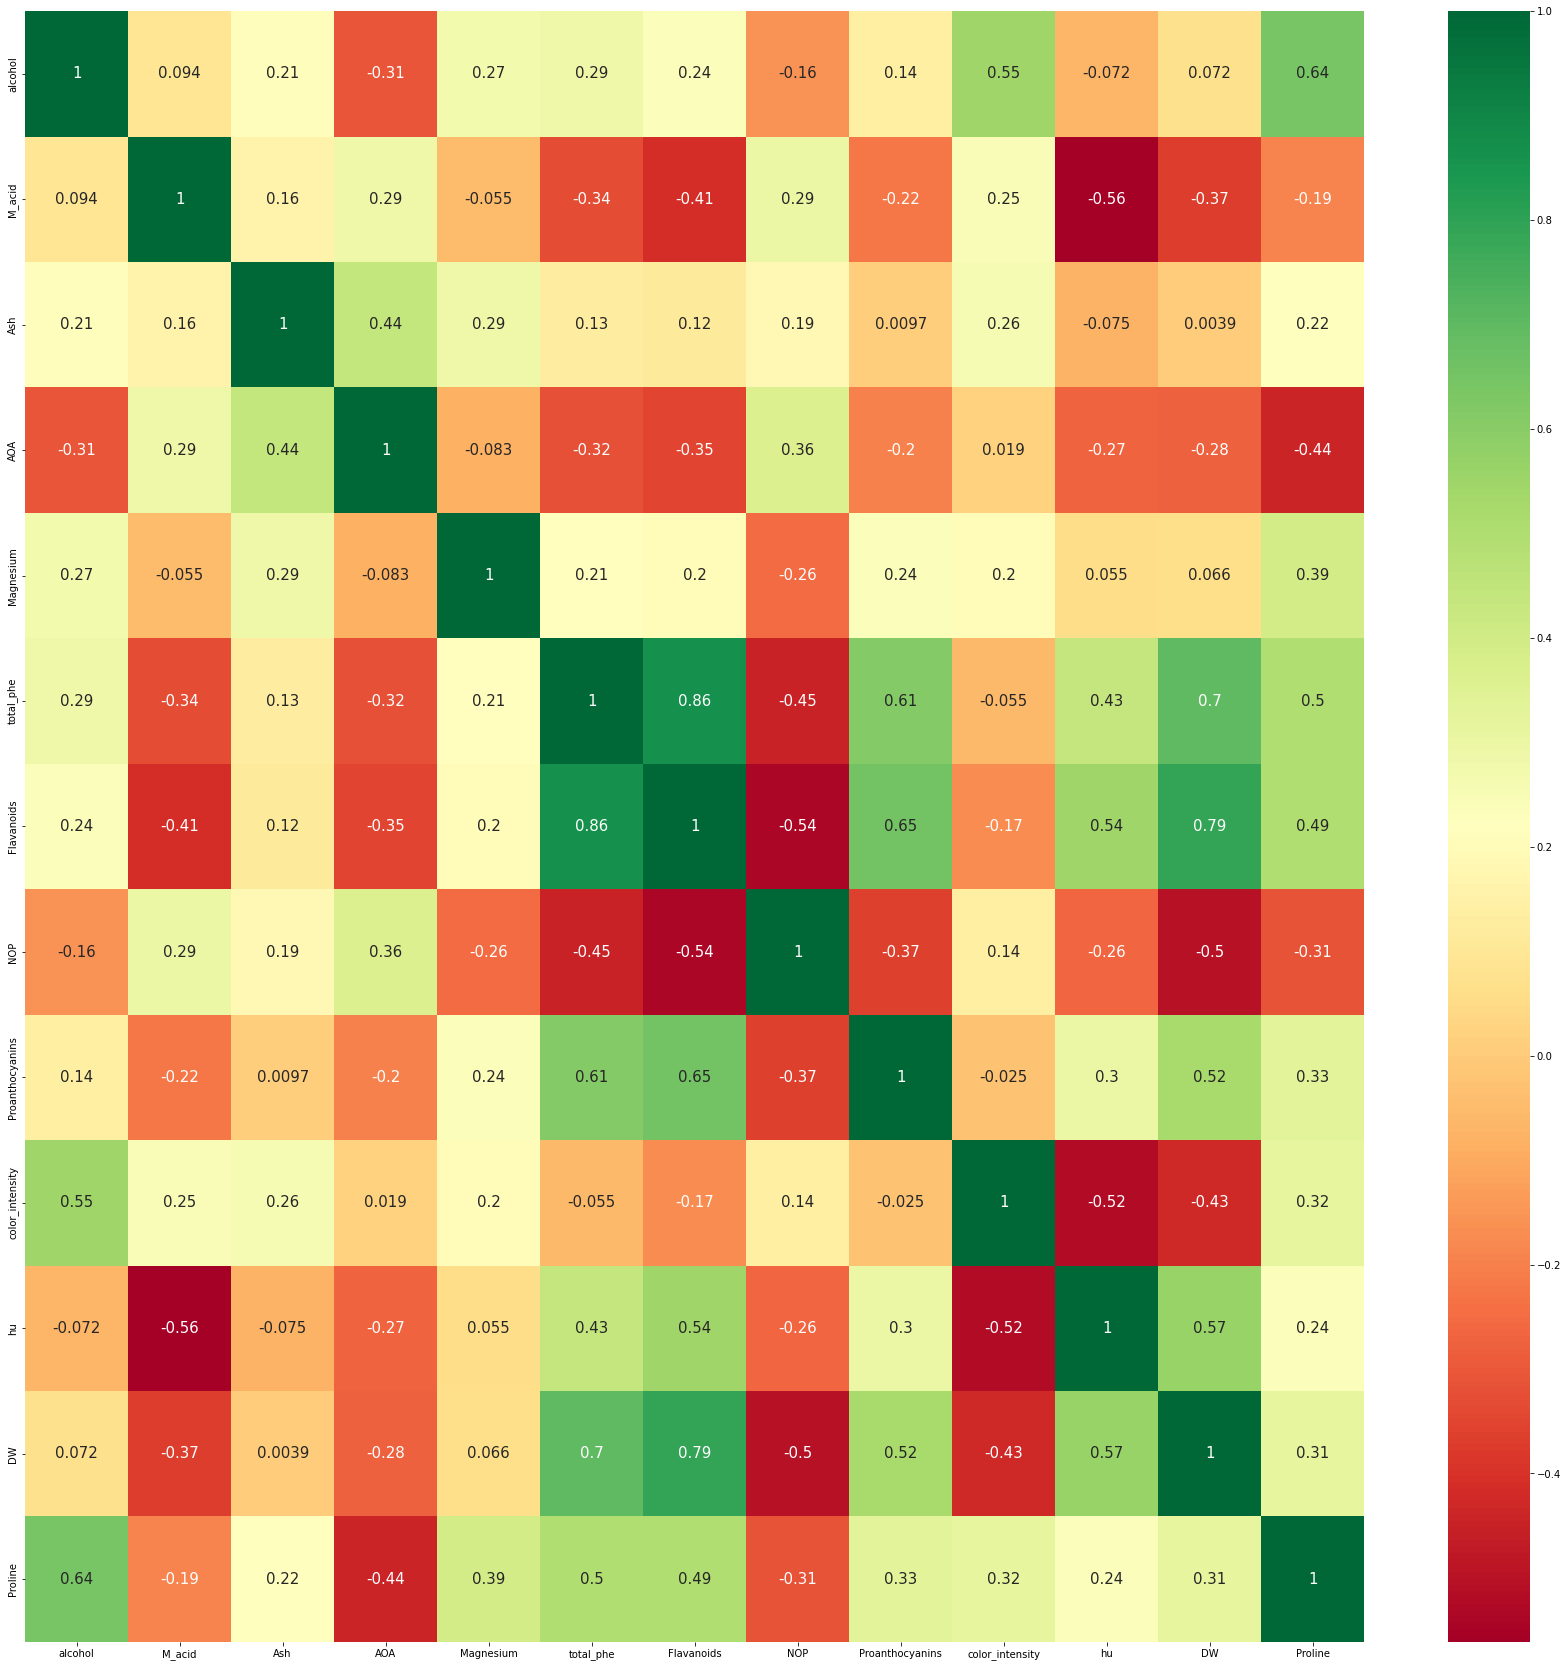

In [41]:
## Checking correlation


plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(box.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation
##Range=-1 to +1
##Threshold value:0.9

## Model building

In [43]:
## Creating independent and dependent variable
x=data.iloc[:,1:]
y=data.wine

In [44]:
y.value_counts()

2    71
1    59
3    48
Name: wine, dtype: int64

In [45]:
### creating train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [46]:
## checking the train and test shape
x_test.shape

(45, 13)

In [47]:
y_test.shape

(45,)

In [48]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(x_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(x_test) ## getting the predict from created model

In [49]:
from sklearn.metrics import f1_score 
f1_knn=f1_score(y_test,y_hat_knn,average='weighted')#checking model performance 
f1_knn

0.7111111111111111

## Using bagging

In [60]:
from sklearn.ensemble import BaggingClassifier#import bagging
KNN2=KNeighborsClassifier() # Model not seen any training data
model_bagg1=BaggingClassifier(base_estimator=KNN2,n_estimators=60) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(x_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(x_test) ## getting the prediction
##improve n_estimators,f1_bagg score improves.

In [61]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted') ## f1  score calculation

In [62]:
f1_bagg#score after bagging

0.7194751208273859